In [1]:
print("Hello World!")

Hello World!


Analyze

In [82]:
import json
import pathlib
import pandas as pd
import statistics
pd.options.display.float_format = '{:.4g}'.format

# Useful function
def load_test_result_data(target: str) -> dict:
    target = pathlib.Path(target).joinpath("result_test")
 
    return {
        i.stem: [{
            "name": pathlib.Path(res["name"]).stem,
            **res}
            for res in json.loads(i.read_text())]
        for i in sorted(target.glob("*.json"))}
#結果を全部集計したやつ


def organize_test_data(test_result_data: dict) -> list:
    result = []
    for k, v in test_result_data.items():
        count=0
        passed_tests = [i for i in v if any([i["test_results"][count]["exit_code"]])]
        failed_tests = [i for i in v if not any([i["test_results"][count]["exit_code"]])]
        count+=1
        
        
        result.append({
            "transformation_name": k,
            "test_pass_rate": len(passed_tests) / len(v),
            "passed_test_num": len(passed_tests),
            "failed_test_num": len(failed_tests),
            "failed_test": [test["name"] for test in failed_tests]
        })
    
    return result
#テストの合格率、合格したテスト数、不合格のテスト数、不合格のテスト名のリストを返す

def convert_to_dataframe(data: dict) -> pd. DataFrame:
    return pd.read_json(json.dumps(data)).set_index("name")


# Please type the name of the property to be analyzed
target_property_name = "prop1"

Test Pass Rate

In [83]:
test_result_data = load_test_result_data(target_property_name)
#for k, v in test_result_data.items():
#    print(k, v)

#print(test_result_data["AddO16"][0]["test_results"][0]["exit_code"])
#print(test_result_data)
test_pass_data = organize_test_data(test_result_data)
df_test_pass_rate = pd.DataFrame(test_pass_data)
print(df_test_pass_rate)

   transformation_name  test_pass_rate  passed_test_num  failed_test_num  \
0               AddO16               1               40                0   
1          AddO16_EncA               1               40                0   
2          AddO16_EncL               1               40                0   
3          AddO16_Flat               1               40                0   
4          AddO16_Virt               1               40                0   
5                AddO4               1               40                0   
6                 EncA               1               40                0   
7          EncA_AddO16               1               40                0   
8            EncA_EncL               1               40                0   
9            EncA_Flat               1               40                0   
10           EncA_Virt               1               40                0   
11                EncL               1               40                0   
12         E

Test Pass Rate Plot

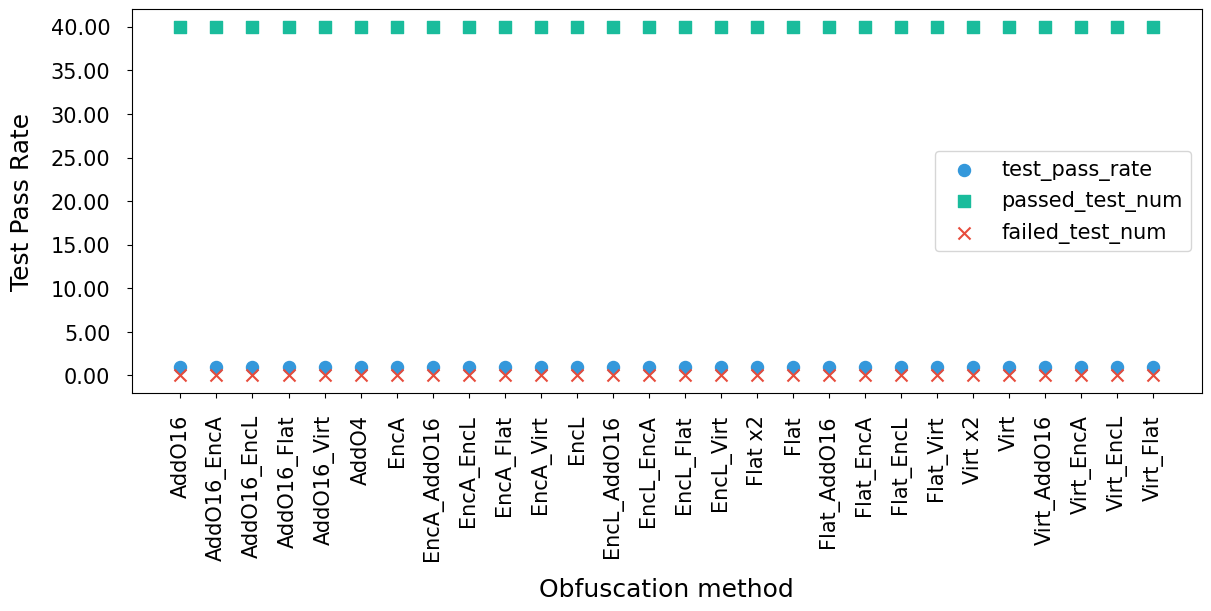

In [109]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('pdf', fonttype=42)

def plot_test_pass_rate(df: pd.DataFrame, fname: str):
    fig, ax = plt.subplots(1, 1, figsize=(12, 6), constrained_layout=True)
    plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

    colors = ["#3498db", "#1abc9c", "#e74c3c", "c"]
    markers = ["o", "s", "x", "h"]
    
    for idx, col in enumerate(df.columns[1:4]):
        plt.scatter(
            x=df.columns[0], y=col, data=df, label=col,
            c=colors[idx], marker=markers[idx], s=75)
        #横軸の文字列回転
        plt.xticks(rotation=90)



    ax.set_axisbelow(True)
    ax.tick_params(axis="x", pad=12, labelsize=15)
    ax.tick_params(axis="y", pad=12, labelsize=15)
    ax.set_xlabel("Obfuscation method", labelpad=12, fontsize=18)
    ax.set_ylabel("Test Pass Rate", labelpad=12, fontsize=18)
    ax.legend(prop=dict(size=15))
    
    fig.savefig(f"{fname}.png")
    plt.show()
    plt.close("all")

# df_code_distance_mean は適切なDataFrameに置き換えてください
plot_test_pass_rate(df=df_test_pass_rate, fname="test_pass_rate")

Code Distance Mean

In [7]:
def load_similarity_data(target: str) -> dict:
    target = pathlib.Path(target).joinpath("result_distance")
    return {
        i.stem: [{
            "name": pathlib.Path(res["name"]).stem,
            **res}
            for res in json.loads(i.read_text())]
        for i in sorted(target.glob("*.json"))}


def calc_distance_mean(similarity_data) -> list:
    return [
        {"transformation_name": k,
         "3gram_Simpson": statistics.mean([1.0 - x["by_3gram_simpson"] for x in v]),
        # "LCSubstr": statistics.mean([1.0 - x["longest_common_substring"] for x in v])
        #  } for k, v in sorted(similarity_data.items())]
         } for k, v in similarity_data.items()]

In [8]:
similarity_data = load_similarity_data(target_property_name)
distance_data = calc_distance_mean(similarity_data)
df_code_distance_mean = pd.DataFrame(distance_data)
print(df_code_distance_mean)

   transformation_name  3gram_Simpson
0               AddO16         0.8716
1          AddO16_EncA         0.7923
2          AddO16_EncL         0.7799
3          AddO16_Flat         0.7878
4          AddO16_Virt         0.6922
5                AddO4         0.8989
6                 EncA         0.8137
7          EncA_AddO16         0.7921
8            EncA_EncL         0.8054
9            EncA_Flat         0.7575
10           EncA_Virt         0.6952
11                EncL         0.9218
12         EncL_AddO16         0.8818
13           EncL_EncA         0.8131
14           EncL_Flat         0.7839
15           EncL_Virt         0.7138
16             Flat x2         0.7796
17                Flat         0.7853
18         Flat_AddO16         0.7985
19           Flat_EncA         0.7567
20           Flat_EncL         0.7857
21           Flat_Virt         0.6941
22             Virt x2         0.7023
23                Virt         0.6925
24         Virt_AddO16         0.7079
25          

Plot Analyzed Data

Index(['3gram_Simpson'], dtype='object')


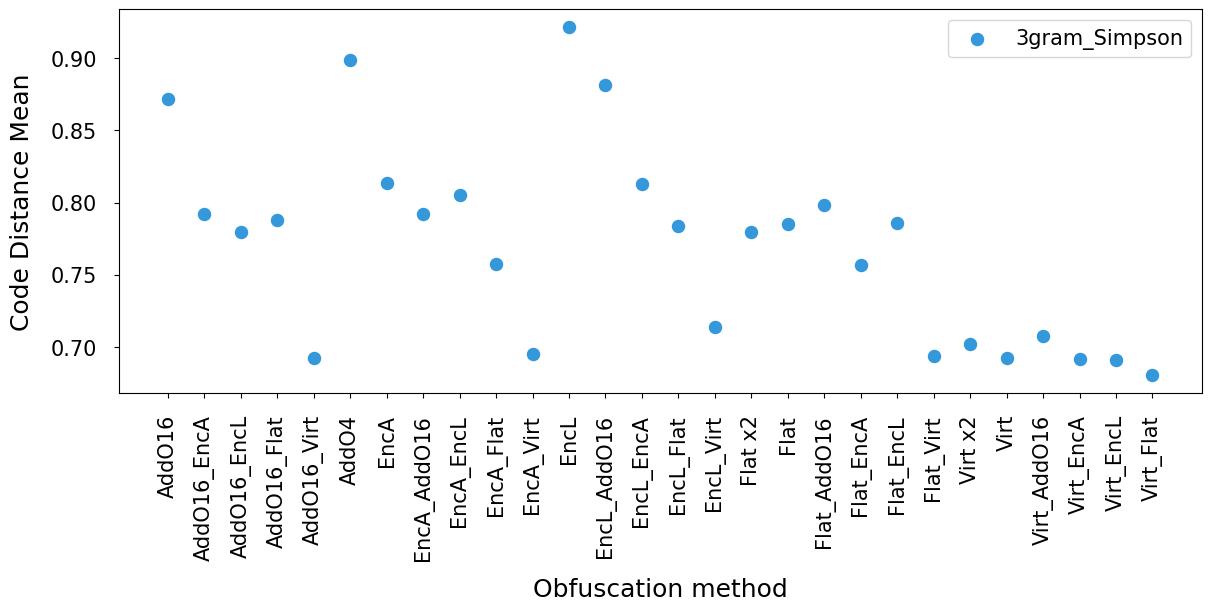

In [101]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('pdf', fonttype=42)

def plot_code_distance_mean(df: pd.DataFrame, fname: str):
    fig, ax = plt.subplots(1, 1, figsize=(12, 6), constrained_layout=True)
    plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

    colors = ["#3498db", "#1abc9c", "#e74c3c"]
    markers = ["o", "s", "x"]
    
    for idx, col in enumerate(df.columns[1:]):
        plt.scatter(
            x=df.columns[0], y=col, data=df, label=col,
            c=colors[idx], marker=markers[idx], s=75)
        #横軸の文字列回転
        plt.xticks(rotation=90)

        print(df.columns[1:])

    ax.set_axisbelow(True)
    ax.tick_params(axis="x", pad=12, labelsize=15)
    ax.tick_params(axis="y", pad=12, labelsize=15)
    ax.set_xlabel("Obfuscation method", labelpad=12, fontsize=18)
    ax.set_ylabel("Code Distance Mean", labelpad=12, fontsize=18)
    ax.legend(prop=dict(size=15))
    
    fig.savefig(f"{fname}.png")
    plt.show()
    plt.close("all")

# df_code_distance_mean は適切なDataFrameに置き換えてください
plot_code_distance_mean(df=df_code_distance_mean, fname="code_distance_mean")